In [2]:
#a 

import numpy as np

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return np.array([r, theta, phi])

def spherical_to_cylindrical(r, theta, phi):
    rho = r * np.sin(theta)
    z = r * np.cos(theta)
    return np.array([rho, phi, z])

def cylindrical_to_spherical(rho, psi, z):
    r = np.sqrt(rho**2 + z**2)
    theta = np.arctan2(rho, z)
    return np.array([r, theta, psi])

def cartesian_to_cylindrical(x, y, z):
    rho = np.sqrt(x**2 + y**2)
    psi = np.arctan2(y, x)
    return np.array([rho, psi, z])

def cylindrical_to_cartesian(rho, psi, z):
    x = rho * np.cos(psi)
    y = rho * np.sin(psi)
    return np.array([x, y, z])

def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    return e_r, e_theta, e_phi

def cylindrical_basis_to_cartesian(phi):
    e_rho = np.array([np.cos(phi), np.sin(phi), 0])
    e_psi = np.array([-np.sin(phi), np.cos(phi), 0])
    e_z = np.array([0, 0, 1])
    return e_rho, e_psi, e_z


r, theta, phi = 1, np.pi/4, np.pi/4
print("Spherical to Cartesian:", spherical_to_cartesian(r, theta, phi))
print("Spherical Basis to Cartesian:", spherical_basis_to_cartesian(theta, phi))


Spherical to Cartesian: [0.5        0.5        0.70710678]
Spherical Basis to Cartesian: (array([0.5       , 0.5       , 0.70710678]), array([ 0.5       ,  0.5       , -0.70710678]), array([-0.70710678,  0.70710678,  0.        ]))


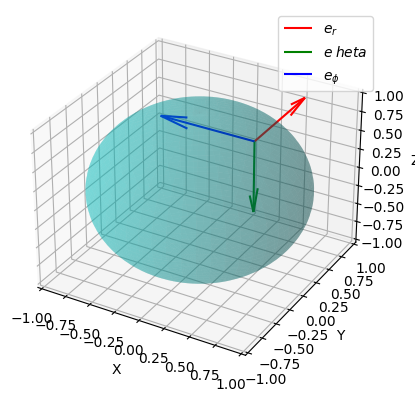

In [1]:


#b 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return np.array([r, theta, phi])

def cylindrical_to_cartesian(rho, psi, z):
    x = rho * np.cos(psi)
    y = rho * np.sin(psi)
    return np.array([x, y, z])

def cartesian_to_cylindrical(x, y, z):
    rho = np.sqrt(x**2 + y**2)
    psi = np.arctan2(y, x)
    return np.array([rho, psi, z])

def spherical_to_cylindrical(r, theta, phi):
    rho = r * np.sin(theta)
    z = r * np.cos(theta)
    return np.array([rho, phi, z])

def cylindrical_to_spherical(rho, psi, z):
    r = np.sqrt(rho**2 + z**2)
    theta = np.arctan2(rho, z)
    return np.array([r, theta, psi])

def plot_local_basis(theta, phi):
    r = 1  #unit sphere
    origin = spherical_to_cartesian(r, theta, phi)
    
    e_r = spherical_to_cartesian(1, theta, phi)
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    # plot basis vectors
    ax.quiver(*origin, *e_r, color='r', label='$e_r$')
    ax.quiver(*origin, *e_theta, color='g', label='$e_\theta$')
    ax.quiver(*origin, *e_phi, color='b', label='$e_\phi$')
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()


plot_local_basis(np.pi/2, np.pi/2)


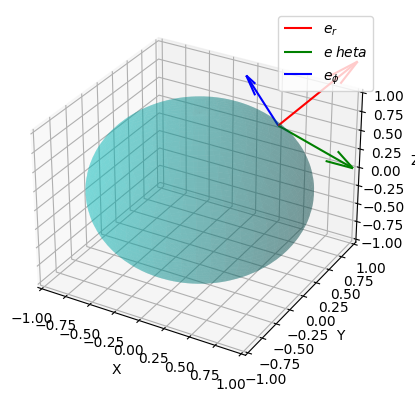

In [3]:
#c 
#it is possible
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    return e_r, e_theta, e_phi

def plot_sphere_with_basis(theta, phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot unit sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    # Compute point and basis vectors
    origin = spherical_to_cartesian(1, theta, phi)
    e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, phi)
    
    # Plot basis vectors
    ax.quiver(*origin, *e_r, color='r', label='$e_r$')
    ax.quiver(*origin, *e_theta, color='g', label='$e_\theta$')
    ax.quiver(*origin, *e_phi, color='b', label='$e_\phi$')
    
    # Labels and limits
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

# Example usage: plot at (theta = pi/4, phi = pi/4)
plot_sphere_with_basis(np.pi/4, np.pi/4)


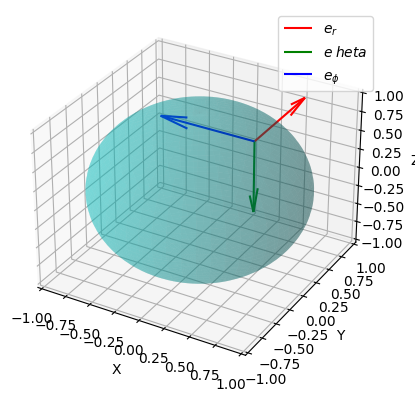

In [5]:
#d 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    return e_r, e_theta, e_phi

def plot_sphere_with_basis(theta, phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    #plot unit sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    #compute point and basis vectors
    origin = spherical_to_cartesian(1, theta, phi)
    e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, phi)
    
    
    ax.quiver(*origin, *e_r, color='r', label='$e_r$')
    ax.quiver(*origin, *e_theta, color='g', label='$e_\theta$')
    ax.quiver(*origin, *e_phi, color='b', label='$e_\phi$')
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

def generate_local_coordinate_system(f, x_range, y_range, dx, dy):
    x = np.linspace(x_range[0], x_range[1], int((x_range[1] - x_range[0]) / dx))
    y = np.linspace(y_range[0], y_range[1], int((y_range[1] - y_range[0]) / dy))
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    
    dZdx, dZdy = np.gradient(Z, dx, dy, axis=(1, 0))
    normals = np.dstack((-dZdx, -dZdy, np.ones_like(Z)))
    normals /= np.linalg.norm(normals, axis=2, keepdims=True)
    
    return X, Y, Z, normals


plot_sphere_with_basis(np.pi/2, np.pi/2)


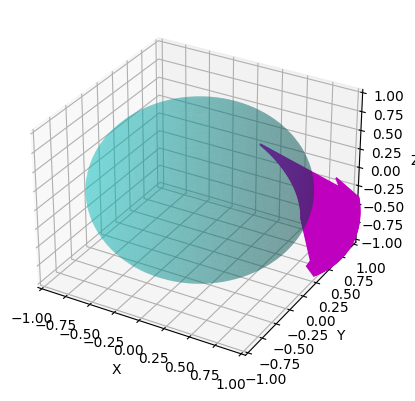

In [6]:
#e

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    return e_r, e_theta, e_phi

def plot_sphere_with_basis(theta, phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
   
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    
    origin = spherical_to_cartesian(1, theta, phi)
    e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, phi)
    
    
    ax.quiver(*origin, *e_r, color='r', label='$e_r$')
    ax.quiver(*origin, *e_theta, color='g', label='$e_\theta$')
    ax.quiver(*origin, *e_phi, color='b', label='$e_\phi$')
    
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

def parallel_transport(theta0, alpha, beta, num_steps=100):
    thetas = np.linspace(theta0, np.pi / 2, num_steps)
    transported_vectors = []
    for theta in thetas:
        e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, 0)
        n_vec = alpha * e_theta + beta * np.sin(theta0) * e_phi
        transported_vectors.append((spherical_to_cartesian(1, theta, 0), n_vec))
    return transported_vectors

def plot_parallel_transport(theta0, alpha, beta):
    transported_vectors = parallel_transport(theta0, alpha, beta)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
    #transported vectors
    for origin, vector in transported_vectors:
        ax.quiver(*origin, *vector, color='m')
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

#transport a vector from theta0 = pi/5 to the equator
plot_parallel_transport(np.pi/5, 1, 0.5)


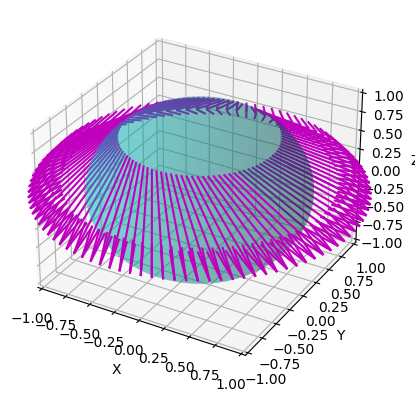

In [7]:
#f

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    return e_r, e_theta, e_phi

def plot_sphere_with_basis(theta, phi):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    

    origin = spherical_to_cartesian(1, theta, phi)
    e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta, phi)
    

    ax.quiver(*origin, *e_r, color='r', label='$e_r$')
    ax.quiver(*origin, *e_theta, color='g', label='$e_\theta$')
    ax.quiver(*origin, *e_phi, color='b', label='$e_\phi$')
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

def parallel_transport_phi(theta0, alpha, beta, num_steps=100):
    phis = np.linspace(0, 2 * np.pi, num_steps)
    transported_vectors = []
    for phi in phis:
        e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta0, phi)
        n_vec = alpha * e_theta + beta * e_phi
        transported_vectors.append((spherical_to_cartesian(1, theta0, phi), n_vec))
    return transported_vectors

def plot_parallel_transport_phi(theta0, alpha, beta):
    transported_vectors = parallel_transport_phi(theta0, alpha, beta)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
   
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.3)
    
  
    for origin, vector in transported_vectors:
        ax.quiver(*origin, *vector, color='m')
    
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

#transport a vector from phi=0 to phi=2π at fixed theta0
plot_parallel_transport_phi(np.pi/4, 1, 0.5)


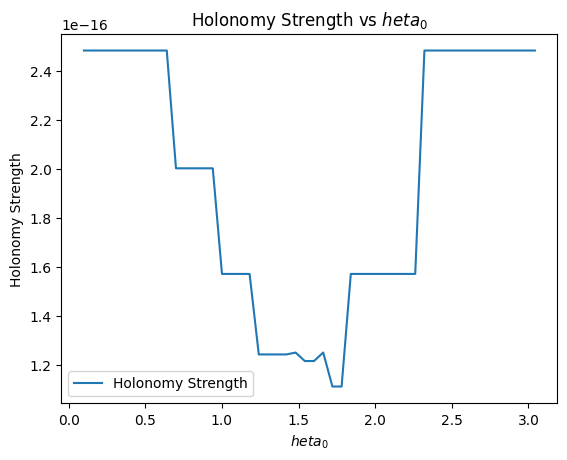

In [8]:
#g

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    e_theta = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    e_phi = np.array([-np.sin(phi), np.cos(phi), 0])
    return e_r, e_theta, e_phi

def parallel_transport_phi(theta0, alpha, beta, num_steps=100):
    phis = np.linspace(0, 2 * np.pi, num_steps)
    transported_vectors = []
    for phi in phis:
        e_r, e_theta, e_phi = spherical_basis_to_cartesian(theta0, phi)
        n_vec = alpha * e_theta + beta * e_phi
        transported_vectors.append((spherical_to_cartesian(1, theta0, phi), n_vec))
    return transported_vectors

def compute_holonomy(theta0, alpha, beta):
    transported_vectors = parallel_transport_phi(theta0, alpha, beta)
    initial_vector = transported_vectors[0][1]
    final_vector = transported_vectors[-1][1]
    holonomy = np.linalg.norm(final_vector - initial_vector)
    return holonomy

def plot_holonomy_vs_theta():
    theta_values = np.linspace(0.1, np.pi - 0.1, 50)
    holonomy_values = [compute_holonomy(theta, 1, 0.5) for theta in theta_values]
    
    plt.figure()
    plt.plot(theta_values, holonomy_values, label='Holonomy Strength')
    plt.xlabel('$\theta_0$')
    plt.ylabel('Holonomy Strength')
    plt.title('Holonomy Strength vs $\theta_0$')
    plt.legend()
    plt.show()

#plot holonomy strength for different theta0
plot_holonomy_vs_theta()
